## Calculate the Markowitz portfolio with the following securities:

1. Alaska black fia
1. gap absoluto fim
1. vista long biased advisory fic fim
1. ibiuna hedge fic multimercado
1. Polo norte 1 long short
1. real investor bdr nivel 1
1. occam icatu prev ficfi mm
1. mypk3
1. viia3
1. btlg11
1. vale3
1. petr4
1. bbas3
1. itsa4
1. cyr3
1. bbse3
1. fixed income

* The investments funds data I got from economática
* The tickets return I got from yfinance library

In [2]:
#!pip install investpy

In [12]:
#!pip install python-bcb

In [149]:
#Take the correct names for the funds using the API from investing.com
import investpy as inv
list_funds=['Alaska black','gap absoluto ','Occam',
            'Ibiuna Hedge ','Polo Norte ','Real Investor ']
for name in list_funds:
  x=inv.search_funds(by='name',value=name)
  for i in range(x.shape[0]):
    print(x.loc[i,'name'])

Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I
Alaska Black Master Fundo De Investimento Em Ações - Bdr Nível I
Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações Ii - Bdr Nível I
Alaska Black Institucional Fundo De Investimento De Acoes
Alfa Alaska Black Institucional - Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações
Itaú Private Gap Absoluto Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Gap Absoluto A Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Gap Absoluto Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Gap Absoluto Master Fundo De Investimento Multimercado
Gap Absoluto P Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado
Itaú Seleção Gap Absoluto Multimercado Fundo De Investimento Em Cotas De Fundos De Investimento
Manager Occam Equity Hedge Fundo De Investimento Em Cotas De Fundos De Investimento Mult

In [150]:
#get the historical data of the funds
from datetime import date,timedelta
import pandas as pd
actual_date=date.today()
#take the actual data and try to take the last five years, if investing doesn't have the data it will bring what it has
begin_date=(actual_date-timedelta(days=1825))

df_alaska=inv.get_fund_historical_data(fund='Alaska Black Institucional Fundo De Investimento De Acoes',country='brazil',
from_date=begin_date.strftime("%d/%m/%Y"),to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]

df_alaska.columns=['C_alk']

df_gap=inv.get_fund_historical_data(fund='Gap Absoluto A Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
                                    country='brazil',from_date=begin_date.strftime("%d/%m/%Y"),
                                    to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]

df_gap.columns=['C_gap']

df_ibiuna=inv.get_fund_historical_data(fund='Ibiuna Hedge Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
                                       country='brazil',from_date=begin_date.strftime("%d/%m/%Y"),
                                       to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]

df_ibiuna.columns=['C_ibi']

df_polonort=inv.get_fund_historical_data(fund='Polo Norte I Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
                                         country='brazil',from_date=begin_date.strftime("%d/%m/%Y"),
                                         to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]

df_polonort.columns=['C_PN']

df_realinv=inv.get_fund_historical_data(fund='Real Investor Fundo De Investimento Em Ações',country='brazil',
from_date=begin_date.strftime("%d/%m/%Y"),to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]

df_realinv.columns=['C_Rinv']

df_occam=inv.get_fund_historical_data(fund='Occam Previdência Master Fundo De Investimento Multimercado',country='brazil',
from_date=begin_date.strftime("%d/%m/%Y"),to_date=actual_date.strftime("%d/%m/%Y"))[['Close']]

df_occam.columns=['C_ocprev']

#read the excel file because we investing doesn't have the information
df_vistalong= pd.read_excel('Databases_reports/Vista Long Biased FIC FIM.xlsx',skiprows=3,header=0)
df_vistalong=df_vistalong[['Data','Cota']]
df_vistalong=df_vistalong[df_vistalong['Cota']!='-']
df_vistalong=df_vistalong.astype({'Cota':'float64'})
df_vistalong.rename(columns={'Cota':'Cota_Vlong'}, inplace=True)
df_vistalong.set_index('Data',inplace=True)

In [151]:
#merge all investment funds and cleaning the data
df_funds=(df_alaska.merge(df_gap, how='left', left_index=True,right_index=True)
                  .merge(df_ibiuna, how='left', left_index=True,right_index=True)
                  .merge(df_vistalong, how='left', left_index=True,right_index=True)
                  .merge(df_polonort, how='left', left_index=True,right_index=True)
                  .merge(df_realinv, how='left', left_index=True,right_index=True)
                  .merge(df_occam, how='left', left_index=True,right_index=True))

df_funds.dropna(inplace=True,axis=0)

In [152]:
df_funds.head()

,C_alk,C_gap,C_ibi,Cota_Vlong,C_PN,C_Rinv,C_ocprev
Date,,,,,,,
2018-11-27,2.023,18.275,240.211,1.011819,7.557,8.833,1.842
2018-11-28,2.040,18.261,240.464,1.032566,7.582,9.037,1.845
2018-11-29,2.054,18.247,240.495,1.031923,7.581,9.089,1.844
2018-11-30,2.044,18.252,240.535,1.033053,7.582,9.032,1.841
2018-12-03,2.049,18.297,241.026,1.043309,7.588,9.078,1.843


In [153]:
df_funds.tail()

,C_alk,C_gap,C_ibi,Cota_Vlong,C_PN,C_Rinv,C_ocprev
Date,,,,,,,
2022-05-10,2.572,28.185,346.367,1.367652,8.215,14.849,2.370
2022-05-11,2.621,28.258,346.694,1.365956,8.165,14.917,2.374
2022-05-12,2.663,28.332,344.575,1.402850,8.213,15.153,2.372
2022-05-13,2.703,28.512,346.098,1.424352,8.308,15.368,2.374
2022-05-16,2.734,28.638,346.165,1.426055,8.378,15.440,2.376


In [154]:
df_funds.shape

(843, 7)

In [155]:
df_funds.dtypes

C_alk         float64
C_gap         float64
C_ibi         float64
Cota_Vlong    float64
C_PN          float64
C_Rinv        float64
C_ocprev      float64
dtype: object

In [156]:
#now for single securities I will use yfinance package
#The tickets are mypk3,viia3,btlg11,vale3,petr4,bbas3,itsa4,cyr3,bbse3
import yfinance as yf
mypk3_df=yf.Ticker('MYPK3.SA').history(start='2018-10-26')[['Close']]
mypk3_df.columns=['C_mypk3']

via3_df=yf.Ticker('VIIA3.SA').history(start='2018-10-26')[['Close']]
via3_df.columns=['C_via3']

bt11_df=yf.Ticker('BTLG11.SA').history(start='2018-10-26')[['Close']]
bt11_df.columns=['C_bt11']

vale3_df=yf.Ticker('VALE3.SA').history(start='2018-10-26')[['Close']]
vale3_df.columns=['C_vale3']

petr4_df=yf.Ticker('PETR4.SA').history(start='2018-10-26')[['Close']]
petr4_df.columns=['C_petr4']

bbas3_df=yf.Ticker('BBAS3.SA').history(start='2018-10-26')[['Close']]
bbas3_df.columns=['C_bbas3']

itsa4_df=yf.Ticker('ITSA4.SA').history(start='2018-10-26')[['Close']]
itsa4_df.columns=['C_itsa4']

cyr3_df=yf.Ticker('CYRE3.SA').history(start='2018-10-26')[['Close']]
cyr3_df.columns=['C_cyr3']

bbse3_df=yf.Ticker('BBSE3.SA').history(start='2018-10-26')[['Close']]
bbse3_df.columns=['C_bbse3']

df_securities=pd.concat([mypk3_df,via3_df,bt11_df,vale3_df,
                        petr4_df,bbas3_df,itsa4_df,cyr3_df,bbse3_df],axis=1)
                        

In [157]:
#merge the funds and tickets by index
portfolio_df=df_funds.merge(df_securities,how='left',left_index=True,right_index=True)
portfolio_df.dropna(inplace=True,axis=0)
portfolio_df.head()

,C_alk,C_gap,C_ibi,Cota_Vlong,C_PN,C_Rinv,C_ocprev,C_mypk3,C_via3,C_bt11,C_vale3,C_petr4,C_bbas3,C_itsa4,C_cyr3,C_bbse3
Date,,,,,,,,,,,,,,,,
2018-11-27,2.023,18.275,240.211,1.011819,7.557,8.833,1.842,20.050280,4.95,72.965332,38.211712,15.924746,36.361877,9.598151,10.838735,20.622602
2018-11-28,2.040,18.261,240.464,1.032566,7.582,9.037,1.845,20.373535,4.95,72.975197,40.033504,15.831181,36.934944,9.820440,10.815837,21.312988
2018-11-29,2.054,18.247,240.495,1.031923,7.581,9.089,1.844,20.475615,5.04,72.008766,39.803867,15.700190,36.515244,9.915709,10.548685,21.142246
2018-11-30,2.044,18.252,240.535,1.033053,7.582,9.032,1.841,20.662762,5.18,72.777969,40.416237,15.881081,36.022877,9.796627,10.869267,21.023468
2018-12-03,2.049,18.297,241.026,1.043309,7.588,9.078,1.843,20.926470,5.12,72.393372,41.418987,16.180492,35.595097,9.725060,10.884532,20.741379


In [158]:
#check null values
portfolio_df.isnull().sum()

C_alk         0
C_gap         0
C_ibi         0
Cota_Vlong    0
C_PN          0
C_Rinv        0
C_ocprev      0
C_mypk3       0
C_via3        0
C_bt11        0
C_vale3       0
C_petr4       0
C_bbas3       0
C_itsa4       0
C_cyr3        0
C_bbse3       0
dtype: int64

In [159]:
portfolio_df.tail()

,C_alk,C_gap,C_ibi,Cota_Vlong,C_PN,C_Rinv,C_ocprev,C_mypk3,C_via3,C_bt11,C_vale3,C_petr4,C_bbas3,C_itsa4,C_cyr3,C_bbse3
Date,,,,,,,,,,,,,,,,
2022-05-10,2.572,28.185,346.367,1.367652,8.215,14.849,2.370,13.12,2.63,102.730278,75.540001,29.110428,33.414837,8.698605,14.30,24.980000
2022-05-11,2.621,28.258,346.694,1.365956,8.165,14.917,2.374,13.49,2.59,102.333069,78.690002,30.124449,34.151855,8.888138,14.03,24.790001
2022-05-12,2.663,28.332,344.575,1.402850,8.213,15.153,2.372,14.28,2.71,101.389671,77.900002,30.357763,35.018349,9.037770,14.39,25.389999
2022-05-13,2.703,28.512,346.098,1.424352,8.308,15.368,2.374,14.87,2.78,102.769997,77.809998,30.752602,34.968552,9.117574,14.42,25.780001
2022-05-16,2.734,28.638,346.165,1.426055,8.378,15.440,2.376,14.59,2.78,103.489998,80.139999,31.057705,34.968552,9.217328,14.92,25.520000


In [160]:
#scale the columns (p1-p0)/p0
for col in portfolio_df.columns:
    portfolio_df[col]=100*(portfolio_df[col].shift(-1)-portfolio_df[col])/portfolio_df[col]
portfolio_df.dropna(inplace=True,axis=0)
portfolio_df.tail()

,C_alk,C_gap,C_ibi,Cota_Vlong,C_PN,C_Rinv,C_ocprev,C_mypk3,C_via3,C_bt11,C_vale3,C_petr4,C_bbas3,C_itsa4,C_cyr3,C_bbse3
Date,,,,,,,,,,,,,,,,
2022-05-06,-2.093643,1.355725,-0.321741,-1.014145,-0.580903,-1.570993,-0.084317,-0.076163,-5.054147,0.946524,-5.290874,-1.875383,-0.886259,-2.022466,2.362204,-0.199765
2022-05-10,1.905132,0.259003,0.094409,-0.124031,-0.608643,0.457943,0.168776,2.820121,-1.520920,-0.386652,4.169978,3.483360,2.205663,2.178892,-1.888115,-0.760603
2022-05-11,1.602442,0.261873,-0.611202,2.701010,0.587875,1.582088,-0.084246,5.856190,4.633210,-0.921889,-1.003941,0.774502,2.537178,1.683507,2.565935,2.420325
2022-05-12,1.502065,0.635324,0.441994,1.532727,1.156703,1.418861,0.084317,4.131654,2.583023,1.361406,-0.115538,1.300617,-0.142203,0.883000,0.208476,1.536043
2022-05-13,1.146874,0.441919,0.019359,0.119575,0.842561,0.468506,0.084246,-1.882984,0.000000,0.700595,2.994476,0.992122,0.000000,1.094089,3.467406,-1.008535


In [161]:
#descriptive statistics
portfolio_df.describe()

,C_alk,C_gap,C_ibi,Cota_Vlong,C_PN,C_Rinv,C_ocprev,C_mypk3,C_via3,C_bt11,C_vale3,C_petr4,C_bbas3,C_itsa4,C_cyr3,C_bbse3
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,0.058219,0.055332,0.044346,0.057368,0.015092,0.083662,0.030810,0.012430,0.026898,0.050363,0.128270,0.129946,0.031682,0.016293,0.101883,0.043328
std,2.062799,0.475907,0.227863,1.780175,0.727092,1.786101,0.139831,3.176102,4.342422,1.264397,2.777054,3.079688,2.691308,2.055381,3.530633,1.876121
min,-18.140010,-2.673715,-1.518635,-14.376629,-5.468649,-15.120447,-0.924642,-21.599994,-31.534088,-16.711455,-24.559216,-29.697771,-16.689533,-10.865407,-24.650201,-9.507699
25%,-0.860897,-0.171737,-0.059956,-0.530570,-0.318918,-0.623634,-0.047755,-1.525351,-2.251657,-0.279257,-1.224834,-1.143433,-1.163948,-1.163836,-1.681764,-1.002149
50%,0.117142,0.027649,0.050968,0.072057,0.026546,0.141750,0.045005,-0.043487,0.000000,0.000000,0.017981,0.141090,0.000000,0.000000,0.000000,0.066186
75%,1.030574,0.287809,0.176193,0.716169,0.378742,0.894783,0.097800,1.527274,2.039335,0.450194,1.422595,1.422641,1.300258,1.182261,1.998828,1.094639
max,13.732834,2.288954,0.889279,13.181059,4.170553,11.578120,0.527704,23.618084,21.294363,8.067391,21.357855,22.222210,17.126065,10.032346,18.055562,10.755815


In [162]:
# get the selic using bcb package
from bcb import sgs
selic=sgs.get({'selic':432},start='2018-11-27')
#Convert selic to a daily return
selic['selic_daily']=((1+selic['selic']*0.01)**(1/252)-1)*100
selic.tail()

,selic,selic_daily
Date,,
2022-05-30,12.75,0.047631
2022-05-31,12.75,0.047631
2022-06-01,12.75,0.047631
2022-06-02,12.75,0.047631
2022-06-03,12.75,0.047631


In [163]:
portfolio_df.shape

(829, 16)

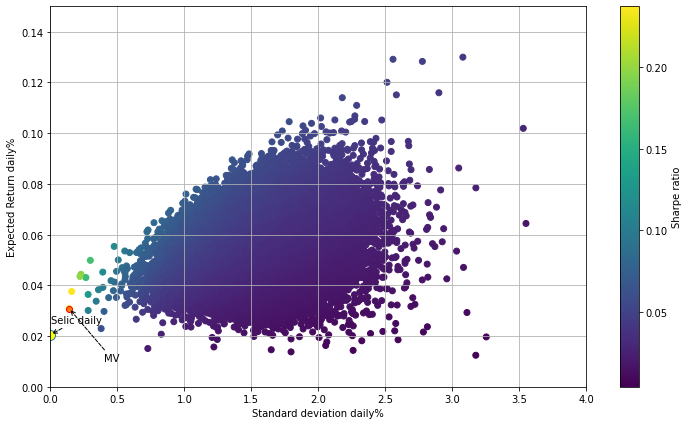

In [164]:
import numpy as np
import matplotlib.pyplot as plt
#Monte-Carlo simulation for portfolio weights

x=np.linspace(0, 1, 2) # create initial values
port_c=np.array(np.meshgrid(x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x)).T.reshape(-1,16) #combination of all values
port_c=port_c[1:,:] # eliminate the portfolio with all zeros 

port_std = []
port_ret = []
port_shp= []
weight=np.zeros((port_c.shape[0],port_c.shape[1]))
#loop all lines and calculate the portfolio weight, return, standard deviation and sharpe
for i in range(port_c.shape[0]):
    w=port_c[i,:]/np.sum(port_c[i,:])
    ret=np.sum(w*portfolio_df.mean())
    var=np.dot(np.dot(w.T,portfolio_df.cov()),w)
    std=np.sqrt(var)
    #considering risk free equal to zero
    sharpe=ret/std
    
    port_std.append(std)
    port_ret.append(ret)
    port_shp.append(sharpe)
    weight[i]=w
    
port_std=np.array(port_std)
port_ret=np.array(port_ret)
port_shp=np.array(port_shp)
#plot figure with x-axis being std and y axis the return    
plt.figure(figsize=(12,7))
plt.scatter(port_std,port_ret,marker='o',c=port_shp)
plt.colorbar(label='Sharpe ratio')
plt.grid(True)
plt.xlabel('Standard deviation daily%')
plt.ylabel('Expected Return daily%')
plt.xlim([0.0,4])
plt.ylim([0,0.15])
#plot the risk free in graph
plt.plot(0,selic['selic_daily'].mean(),marker="o", markersize=10, markerfacecolor="yellow")
plt.annotate('Selic daily',(0,selic['selic_daily'].mean()),
             xytext=(0.003,0.025),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))
#plot the minimum variance point
plt.plot(np.min(port_std),port_ret[np.argmin(port_std)],marker="o",markeredgecolor="red")
plt.annotate('MV',(np.min(port_std),port_ret[np.argmin(port_std)]),
             xytext=(0.4,0.01),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))
plt.show()    




In [165]:
#print the less riskier portfolio 'MV'
for w,c in zip(weight[np.argmin(port_std)],portfolio_df.columns):
    print(c,round(100*w,2),'%')

C_alk 0.0 %
C_gap 0.0 %
C_ibi 0.0 %
Cota_Vlong 0.0 %
C_PN 0.0 %
C_Rinv 0.0 %
C_ocprev 100.0 %
C_mypk3 0.0 %
C_via3 0.0 %
C_bt11 0.0 %
C_vale3 0.0 %
C_petr4 0.0 %
C_bbas3 0.0 %
C_itsa4 0.0 %
C_cyr3 0.0 %
C_bbse3 0.0 %


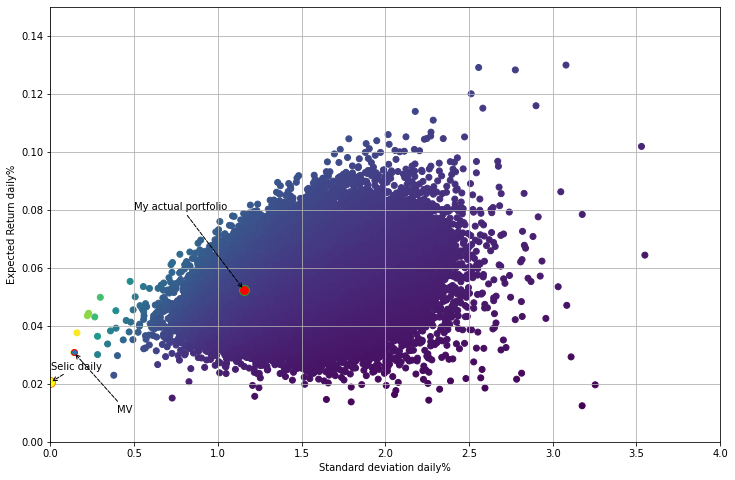

In [166]:
# plot my actual portfolio
w1=np.array([0.11,0.07,0.05,0.07,0.06,0.25,0.23,0.06,0.02,0.02,0.005,0.02,0.012,0.01,0.007,0.006])
ret1=np.sum(w1*portfolio_df.mean())
var1=np.dot(np.dot(w1.T,portfolio_df.cov()),w1)
std1=np.sqrt(var1)
sharpe1=ret1/std1
plt.figure(figsize=(12,8))
plt.scatter(port_std,port_ret,marker='o',c=port_shp)
plt.grid(True)
plt.xlabel('Standard deviation daily%')
plt.ylabel('Expected Return daily%')
plt.xlim([0.0,4])
plt.ylim([0,0.15])

#plot the minimum variance point
plt.plot(np.min(port_std),port_ret[np.argmin(port_std)],marker="o",markeredgecolor="red")
plt.annotate('MV',(np.min(port_std),port_ret[np.argmin(port_std)]),
             xytext=(0.4,0.01),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))


#plot the risk free in graph
plt.plot(0,selic['selic_daily'].mean(),marker="o", markersize=10, markerfacecolor="yellow")
plt.annotate('Selic daily',(0,selic['selic_daily'].mean()),
             xytext=(0.003,0.025),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#plot  my actual portfolio in graph
plt.plot(std1,ret1,marker="o", markersize=10, markerfacecolor="red")
plt.annotate('My actual portfolio',(std1,ret1),xytext=(0.5,0.08),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))
plt.show() 

In [167]:
from scipy.optimize import minimize
#The constraint is the sum of weights should be 1
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
#Every weigth for each portfolio should be between 0 and 1 
bounds = tuple((0,1) for x in range(portfolio_df.shape[1]))
#The optimize need a initial weight
w_initial = portfolio_df.shape[1] * [1/portfolio_df.shape[1]]

#Maximize a function f is the same as minimize a function -f
def min_shp(w):  
    ret=np.sum(w*portfolio_df.mean())
    var=np.dot(np.dot(w.T,portfolio_df.cov()),w)
    std=np.sqrt(var)
    shp=ret/std
    return -shp

shp_opt=minimize(min_shp,
                        w_initial,
                        method = 'SLSQP',
                        bounds = bounds,
                        constraints = constraints)


In [168]:
#print the higher sharpe without considering the risk free
for w,c in zip(shp_opt.x,portfolio_df.columns):
    print(c,round(100*w,2),'%')

C_alk 0.0 %
C_gap 4.48 %
C_ibi 27.85 %
Cota_Vlong 0.0 %
C_PN 0.0 %
C_Rinv 0.0 %
C_ocprev 67.67 %
C_mypk3 0.0 %
C_via3 0.0 %
C_bt11 0.0 %
C_vale3 0.0 %
C_petr4 0.0 %
C_bbas3 0.0 %
C_itsa4 0.0 %
C_cyr3 0.0 %
C_bbse3 0.0 %


In [169]:
# create the bins (range of returns) to find the minimum std for those
bins=np.linspace(0.005,0.12,50)
std_eff=[]
w_eff=[]

#function to minimize
def min_std(w):
    w=np.array(w)
    ret=np.sum(w*portfolio_df.mean())
    var=np.dot(np.dot(w.T,portfolio_df.cov()),w)
    std=np.sqrt(var)
    return std

#The return should be equal to the bins created
def get_return(w):
    w=np.array(w)
    ret=np.sum(w*portfolio_df.mean())
    return ret

for r in bins:
    constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1},{'type' : 'eq', 'fun': lambda x: get_return(x) -r})
    bounds = tuple((0,1) for x in range(portfolio_df.shape[1]))
    w_initial = portfolio_df.shape[1] * [1/portfolio_df.shape[1]]

    std_opt=minimize(min_std,
                            w_initial,
                            method = 'SLSQP',
                            bounds = bounds,
                            constraints = constraints)
    w_eff.append(std_opt.x)
    std_eff.append(min_std(std_opt.x))

In [170]:
#Create a dataframe with the efficient frontier
df_eff=pd.DataFrame({'weights':w_eff,'std':std_eff,'ret':bins})
#create a column including the risk free
df_eff['sharpe']=(df_eff['ret']-selic['selic_daily'].mean())/df_eff['std']
# Find the value which is the higher sharp ratio and it is the tangent point
print('The maximum sharpe is ',df_eff.loc[df_eff['sharpe'].idxmax()]['sharpe'])
print('')
#find the weights of the point which tangency the efficient frontier 
print( 'The portfolio that tangency the efficient frontier is:')
print('')
for w,c in zip(df_eff.loc[df_eff['sharpe'].idxmax()]['weights'],portfolio_df.columns):
    print(c,round(100*w,2),'%')

The maximum sharpe is  0.1142693725585188

The portfolio that tangency the efficient frontier is:

C_alk 0.0 %
C_gap 14.35 %
C_ibi 60.1 %
Cota_Vlong 0.0 %
C_PN 0.0 %
C_Rinv 0.0 %
C_ocprev 25.47 %
C_mypk3 0.0 %
C_via3 0.0 %
C_bt11 0.0 %
C_vale3 0.09 %
C_petr4 0.0 %
C_bbas3 0.0 %
C_itsa4 0.0 %
C_cyr3 0.0 %
C_bbse3 0.0 %


In [171]:
df_eff.head(10)

,weights,std,ret,sharpe
0,"[1.1786356902790538e-18, 2.176053846768394e-13...",3.176102,0.005000,-0.004878
1,"[0.0, 1.3378737074478332e-19, 1.41433168585119...",3.176102,0.007347,-0.004140
2,"[3.632013768366066e-20, 1.2613536581347453e-13...",3.176102,0.009694,-0.003401
3,"[2.7350245714077747e-18, 1.8573337256868468e-1...",3.176102,0.012041,-0.002662
4,"[2.435551760271437e-15, 0.0, 0.0, 0.0, 0.73531...",1.199593,0.014388,-0.005091
5,"[0.0, 5.689893001203927e-15, 6.494804694057166...",0.653057,0.016735,-0.005757
6,"[0.0, 0.0, 1.1587952819525071e-15, 0.0, 0.7461...",0.548006,0.019082,-0.002578
7,"[8.534839501805891e-16, 1.3739009929736312e-15...",0.444385,0.021429,0.002102
8,"[0.0, 2.2104782574842243e-16, 4.44089209850062...",0.343492,0.023776,0.009552
9,"[0.0, 4.7389900373701244e-17, 0.0, 0.0, 0.2982...",0.248669,0.026122,0.022633


In [172]:
#Create the vector X and Y that represents the CML vector
from sklearn.linear_model import LinearRegression

X=X=np.array([0,df_eff.loc[df_eff['sharpe'].idxmax()]['std']]).reshape(-1, 1)
y=np.array([selic['selic_daily'].mean(),df_eff.loc[df_eff['sharpe'].idxmax()]['ret']])

model=LinearRegression()
model.fit(X,y)
print('the intercept is',model.intercept_) #this should be equal to selic mean
print('the angular coefficient is',model.coef_) #This should be equal the maximum sharpe in efficient frontier


the intercept is 0.020494427559952136
the angular coefficient is [0.11426937]


In [173]:
#using the statsmodel for regression
import statsmodels.api as sm

X1 = sm.add_constant(X)
model1 = sm.OLS(y, X1).fit()
print("Parameters: ", model1.params)


Parameters:  [0.02049443 0.11426937]


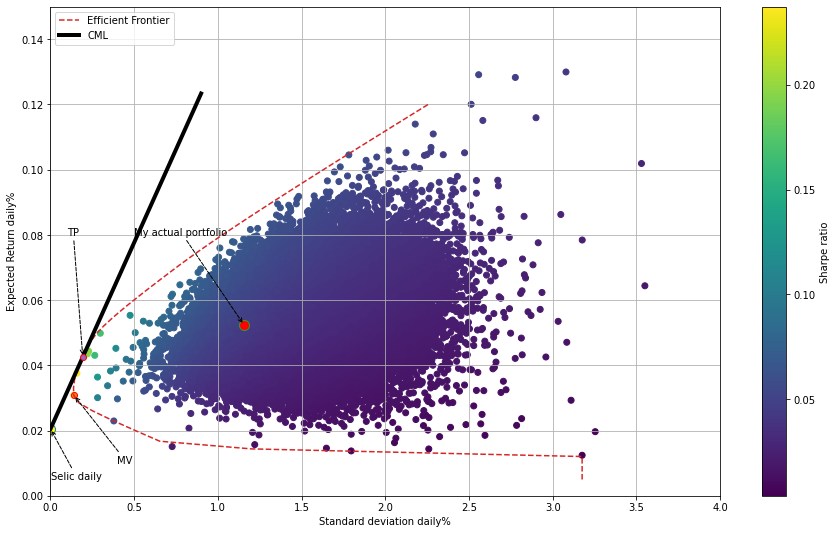

In [174]:
#plot figure    
plt.figure(figsize=(15,9))
plt.scatter(port_std,port_ret,marker='o',c=port_shp)
plt.colorbar(label='Sharpe ratio')
plt.grid(True)
plt.xlabel('Standard deviation daily%')
plt.ylabel('Expected Return daily%')
plt.xlim([0.0,4])
plt.ylim([0,0.15])

#plot the risk free in graph
plt.plot(0,selic['selic_daily'].mean(),marker="o", markersize=10, markerfacecolor="yellow")
plt.annotate('Selic daily',(0,selic['selic_daily'].mean()),
             xytext=(0.003,0.005),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#plot the minimum variance point
plt.plot(np.min(port_std),port_ret[np.argmin(port_std)],marker="o",markeredgecolor="red")
plt.annotate('MV',(np.min(port_std),port_ret[np.argmin(port_std)]),
             xytext=(0.4,0.01),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#plot  my actual portfolio in graph
plt.plot(std1,ret1,marker="o", markersize=10, markerfacecolor="red")
plt.annotate('My actual portfolio',(std1,ret1),xytext=(0.5,0.08),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#plot efficient frontier
plt.plot(std_eff,bins,'--',label='Efficient Frontier')

#plot the regression line(CML)
X_plot=np.linspace(0,0.9,10)
plt.plot(X_plot,model.predict(X_plot.reshape(-1, 1)),lw='4',color='black',label='CML')
plt.legend(loc='upper left')



#plot the tangency point
plt.plot(df_eff.loc[df_eff['sharpe'].idxmax()]['std'],
         df_eff.loc[df_eff['sharpe'].idxmax()]['ret'],marker="o",markeredgecolor="red")

plt.annotate('TP',(df_eff.loc[df_eff['sharpe'].idxmax()]['std'],df_eff.loc[df_eff['sharpe'].idxmax()]['ret']),
            xytext=(0.1,0.08),
            arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

plt.show()  

In [175]:
df_eff['weights'][(df_eff['std']>=std1) & (df_eff['std']<std1+0.1)].values[0]

array([2.43555176e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.35314149e-01, 0.00000000e+00, 0.00000000e+00, 2.64685851e-01,
       2.63677968e-14, 0.00000000e+00, 0.00000000e+00, 1.23095978e-14,
       7.90340016e-15, 1.31838984e-15, 1.63688507e-14, 3.63598041e-15])

In [176]:
#considering the risk that I'm already taking, the best portoflio should be:
best_i=df_eff[(df_eff['std']>=std1) & (df_eff['std']<std1+0.03)].index
best_w=df_eff['weights'].loc[best_i].values[0]
best_std=df_eff['std'].loc[best_i].values
best_ret=df_eff['ret'].loc[best_i].values

In [177]:
#best portfolio considering my risks should be:
for w,c in zip(best_w,portfolio_df.columns):
    print(c,round(100*w,2),'%')

C_alk 0.0 %
C_gap 59.94 %
C_ibi 0.0 %
Cota_Vlong 0.0 %
C_PN 0.0 %
C_Rinv 0.0 %
C_ocprev 0.0 %
C_mypk3 0.0 %
C_via3 0.0 %
C_bt11 0.0 %
C_vale3 25.38 %
C_petr4 14.68 %
C_bbas3 0.0 %
C_itsa4 0.0 %
C_cyr3 0.0 %
C_bbse3 0.0 %


In [178]:
X=X=np.array([0,best_std]).reshape(-1, 1)
y=np.array([selic['selic_daily'].mean(),best_ret])

model=LinearRegression()
model.fit(X,y)
print('the intercept is',model.intercept_) #this should be equal to selic mean
print('the angular coefficient is',model.coef_) #This should be equal the maximum sharpe in efficient frontier

the intercept is 0.020494427559952143
the angular coefficient is [0.05503461]


C:\Users\guilh\AppData\Local\Temp/ipykernel_17176/838599410.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=X=np.array([0,best_std]).reshape(-1, 1)
C:\Users\guilh\AppData\Local\Temp/ipykernel_17176/838599410.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y=np.array([selic['selic_daily'].mean(),best_ret])


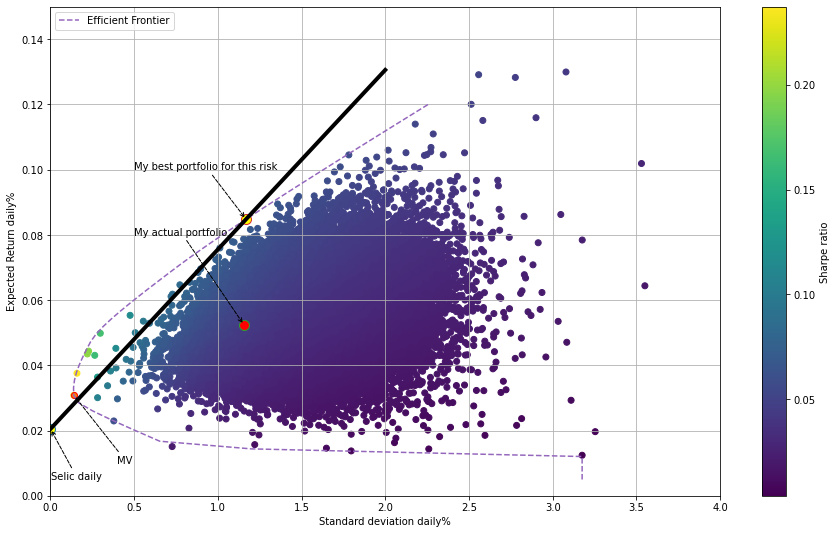

In [179]:
#plot figure    
plt.figure(figsize=(15,9))
plt.scatter(port_std,port_ret,marker='o',c=port_shp)
plt.colorbar(label='Sharpe ratio')
plt.grid(True)
plt.xlabel('Standard deviation daily%')
plt.ylabel('Expected Return daily%')
plt.xlim([0.0,4])
plt.ylim([0,0.15])

#plot the risk free in graph
plt.plot(0,selic['selic_daily'].mean(),marker="o", markersize=10, markerfacecolor="yellow")
plt.annotate('Selic daily',(0,selic['selic_daily'].mean()),
             xytext=(0.003,0.005),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#plot the minimum variance point
plt.plot(np.min(port_std),port_ret[np.argmin(port_std)],marker="o",markeredgecolor="red")
plt.annotate('MV',(np.min(port_std),port_ret[np.argmin(port_std)]),
             xytext=(0.4,0.01),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#plot  my actual portfolio in graph
plt.plot(std1,ret1,marker="o", markersize=10, markerfacecolor="red")
plt.annotate('My actual portfolio',(std1,ret1),xytext=(0.5,0.08),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#my best portfolio for the risk
plt.plot(best_std,best_ret,marker="o", markersize=10, markerfacecolor="yellow")
plt.annotate('My best portfolio for this risk',(best_std,best_ret),xytext=(0.5,0.1),
             arrowprops = dict(arrowstyle= '->',facecolor ='black',lw=1,ls='--'))

#plot efficient frontier
plt.plot(std_eff,bins,'--',label='Efficient Frontier')

#plot the regression line for my risk
X_plot=np.linspace(0,2,10)
plt.plot(X_plot,model.predict(X_plot.reshape(-1, 1)),lw='4',color='black')
plt.legend(loc='upper left')